# Novelty detection using LSTMs


## Denoising Autoencoder for Acoustic Novelty Detection with Bidirectional Long Short-Term Memory


L'évaluation FSD-311 Machine Learning | Alexandre L. Cavalcanti
<!-- *   introduisent la problématique,   
*   amènent des intuitions sur le sujet,
*   exposent une analyse scientifique
*   et apportent des outils -->


In this presentation, we'll cover the subject of the **Novelty detection using LSTMs**, specifically a *Denoising Autoencoder* for Acoustic *Novelty Detection* with *Bidirectional LSTM (BLSTM)*. First of all, let's understand which one of this terms making a short review of them.

### Novelty Detection (ND)


Definition: is a *one-class classification problem*

Normally, we work with the *two-class classification problem* that aims to learn the plane or hyperplane that best discriminates the two classes.

The problem of *novelty detection* however is approach within the framework of one class classification in which one class, which is call a **normal class**, has to be distinguished from all other possibilities. In general novelty detection methods *build some level of normality* and *assign novelty scores* to the data, deviation from normality are them detected according to decision boundary.

Several methods have been proposed in the literature:

1.   *Probabilistic ND*: involves a density estimation of the data in the normal class. They assume that low density areas have a low probability of containg normal objects.
2.   *Distance-based ND*: include the concepts of nearest neighbour and clustering analysis. The assumption here is that normal data are tightly clustered while novel data occur far from their nearest neighbours.
3.   *Domain-based ND*: these method attempt to describe a domain containing normal data by defining a boundary around the normal class such that it follows the distribuition of the data but they do not explicity provide the distribuition in high density regions.
4.   *Reconstruction-based ND*: involve training a regression model using the normal data when new data are mapped using the train model The reconstruction error between the regression target the observed value is related to the novelty score.
5.   *Information-theoretic ND*: computes the information content in the training data using information theoretic measures such as entropy or kolmogorov complexity. The main concept here is that novel data significantly change the information contents of the data sets.

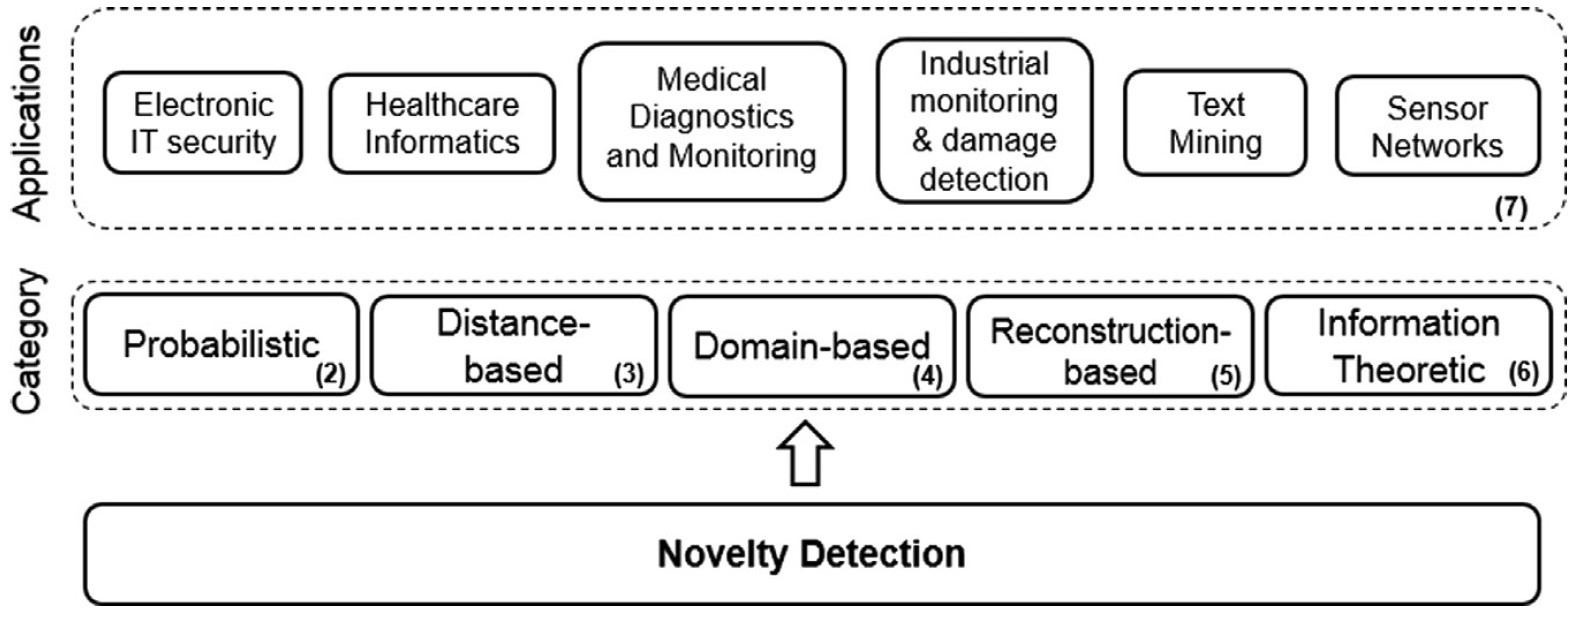

For more details you can download the paper "A Review of Novelty Detection", from [M. A. F. Pimentel](https://www-sciencedirect-com.rev-doc.isae.fr/science/article/pii/S016516841300515X/pdfft?md5=7c8fb4475b4d59a1a5c03103df108484&pid=1-s2.0-S016516841300515X-main.pdf).


### Denoising Autoencoder (DAE)


To comprehend the Denoising Autoencoder we have to review the *Basic Autoencoder*
>> *Basic Autoencoder*: is a kind of neural network typically consisting of only one hidden layer, that sets the target values to be equal to the input. Formally, in reponse to an input example $x \in R^m$, the hidden representation $h(x) \in R^m$ is 
>>> $h(x) = f(W_1x+b_1)$,

>>where $f(z)$ is a non-linear activation function, typically a logistic sigmoid function $f(z) = 1/(1+exp(-z))$ applied component-wise, $W_1 \in m \times n$ is a weight matrix , and $b_1 \in R^n$ is a bias vector.

>>The network output maps the hidden representation $h$ back to a reconstruction $\widetilde{x}\in R^n$:
>>>$\widetilde{x} = f(W_2h(x)+b_2)$

>>where $W_2 \in n \times m$ is a weight matrix, and $b_2 \in R^n$ is a bias vector.

>>Given an input set of examples $\chi$, autoenconder training consists in finding parameters $\theta = \{W_1, W_2, b_1, b_2\}$ that minimise the reconstruction error, which corresponds to minimising the following objective function:
>>> $\mathcal{J}(\theta) = \sum_{x\in\chi} \parallel x - \widetilde{x}\parallel^2$


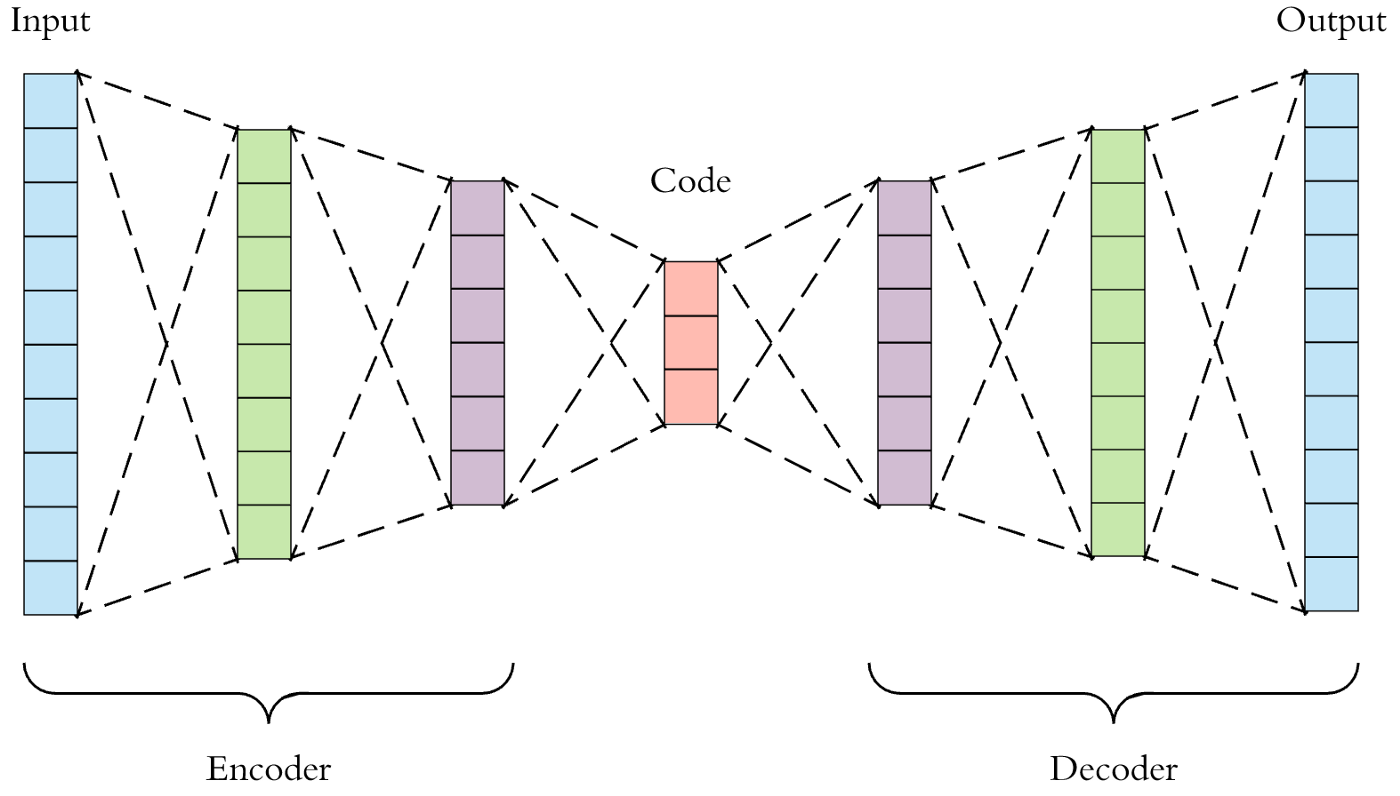

https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798

<!-- ~Then, we have to pass through the *Compression Autoencoder (CAE)*, that is nothing more than having $m < n$ the networkin is forced to learn a compressed representation of the input. In other words, the CAE is able to learn those correlations and reconstruct the input data from a compressed representation.~ -->

Finally, we can explain the ideia of the *Denoising Autoencoder*, that is in order to force the hidden layer to retrieve more robust features and prevent it from simply learning the identity, the autoencoder is trained to reconstruct the input from a corrupted version of it.

Formally, the initial input $x$ is corrupted by means of additive isotropic Gaussian noise in order to obtain: $x'|x\sim N(x, \sigma^2I)$. The corrupted input$x'$ is then mapped, as with the basic autoencoder, to a hidden representation
> $h(x') = f(W_1'x'+b_1')$,

from which we reconstruct a the original signal as follows:
>$\widetilde{x}' = f(W_2'x+b_2')$

The parameters $\theta'=\{W_1',W_2',b_1',b_2'\}$ are trained to minimise the average reconstruction error over the training set, to have $\widetilde{x}'$ as close as possible to the uncorrupted input $x$, which corresponds to minimising the objective function objective $\mathcal{J}(\theta)$.[1]



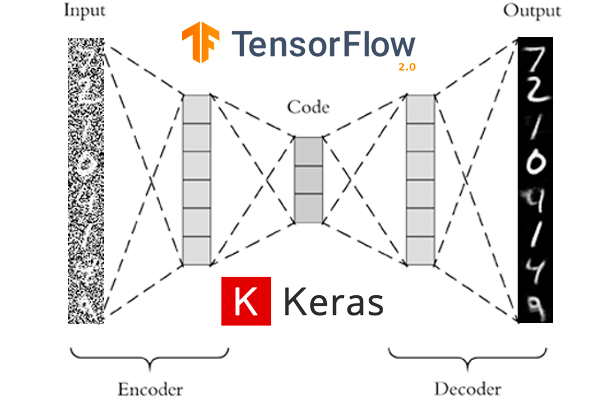

https://www.pyimagesearch.com/2020/02/24/denoising-autoencoders-with-keras-tensorflow-and-deep-learning/

### Bidirectional Long Short-Term Memory (BLSTM)



To start the explanation we have to well-understood the *Long Short-Term Memory 
(LSTM)*

We know that [LSTM](https://en.wikipedia.org/wiki/Long_short-term_memory) is an artificial neural network (ANN): like a multi-layered Perceptron (MLP), it propagates the signal forward (feedforward neural network), but LSTM is directional, so it repropagates backwards as well, but it is recurrent (RNN), so it maintains memory, the output of the network is an input from the network itself (feedback connections) in order to maintain the memory of the neuron weights.


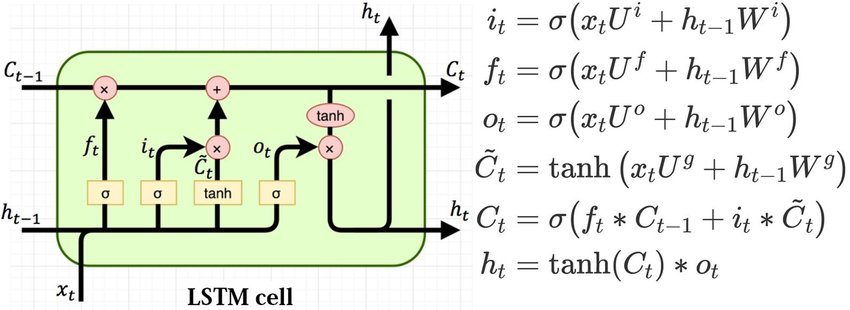

https://www.researchgate.net/figure/Structure-of-the-LSTM-cell-and-equations-that-describe-the-gates-of-an-LSTM-cell_fig5_329362532

where:
*   $x_t\in R^d$: input vector to the LSTM unit
*   $i_t\in R^h$: input/update gate's activation vector
*   $f_t\in R^h$: forget gate's activation vector
*   $o_t\in R^h$: output gate's activation vector
*   $h_t\in R^h$: hidden state vector also known as output vector of the LSTM unit
*   $\widetilde{C}_t\in R^h$: cell input activation vector
*   $C_t\in R^h$: cell state vector
*   $W\in R^{h\times d}$ and $U\in R^{h\times h}$: weight matrices
*   $b\in R^{h}$: bias vector

the superscrips $d$ and $h$ refer to the number of input features and number of hidden units, respectively.





That intuitive explanation helps to start find ourselves in the middle of the Deep Learning.

Then to include the bidirectionality we have to understand the principle of [*Bidirectional Recurrent Neural Networks (BRNN)*](https://en.wikipedia.org/wiki/Bidirectional_recurrent_neural_networks):

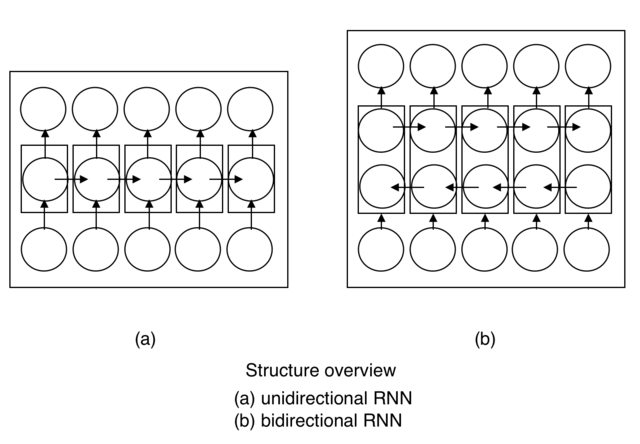

The principle of BRNN is to split the neurons of a regular RNN into two directions, one for positive time direction (forward states), and another for negative time direction (backward states), that is it can access context from both temporal directions. This is achived by processing the input data in both directions with two separete hidden layers. So the BLSTM is a BRNN that the hidden layer is composed with LSTM cells(memory blocks). 

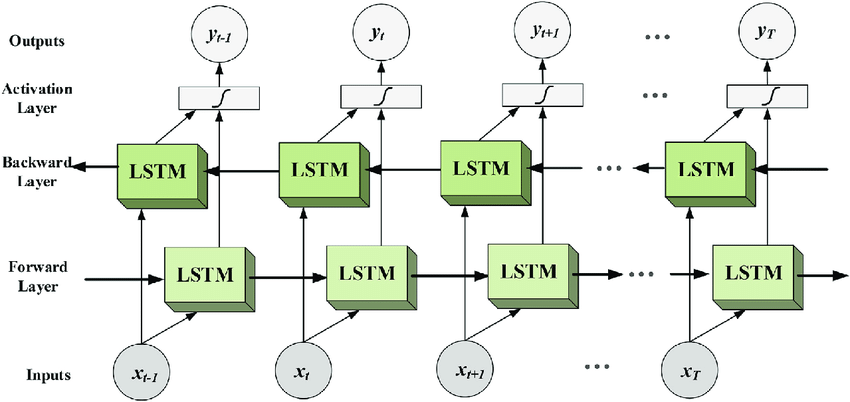

https://www.researchgate.net/figure/Basic-structure-of-the-BLSTM-network-The-LSTM-nets-at-the-bottom-indicate-the-forward_fig3_324056729

One limitation of this method is that using BLSTM networks makes it impossible to use the system for online processing as a look-ahead buffet is needed.

## [BLSTM example for Sequence Classification with Keras](https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/)

In [33]:
from random import random
from numpy import array
from numpy import cumsum

# create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	return X, y

In [34]:
X, y = get_sequence(10)
print(X)
print(y)

[0.33195039 0.08088288 0.3696413  0.15203022 0.13567523 0.43040901
 0.02424055 0.49916495 0.61961421 0.4593044 ]
[0 0 0 0 0 0 0 0 1 1]


In [35]:
# create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	# reshape input and output data to be suitable for LSTMs
	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y

In [36]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
  
# define problem properties
n_timesteps = 10

# define LSTM
model = Sequential()
#LSTM(# of first hidden layer memory units, 
#     activation='tanh',
#     recurrent_activation='sigmoid',
#     use_bias=True,
#     inputlayer=(# of timesteps, # of features)
#     return_sequences= whether to return the last output)
model.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train LSTM
for epoch in range(1000):
	# generate new random sequence
	X,y = get_sequence(n_timesteps)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=1, batch_size=1, verbose=2)
# evaluate LSTM
X,y = get_sequence(n_timesteps)
yhat = model.predict_classes(X, verbose=0)
for i in range(n_timesteps):
	print('Expected:', y[0, i], 'Predicted', yhat[0, i])

1/1 - 2s - loss: 0.7207 - accuracy: 0.5000
1/1 - 0s - loss: 0.7583 - accuracy: 0.2000
1/1 - 0s - loss: 0.7307 - accuracy: 0.3000
1/1 - 0s - loss: 0.7148 - accuracy: 0.4000
1/1 - 0s - loss: 0.7113 - accuracy: 0.4000
1/1 - 0s - loss: 0.7361 - accuracy: 0.3000
1/1 - 0s - loss: 0.6933 - accuracy: 0.4000
1/1 - 0s - loss: 0.7228 - accuracy: 0.3000
1/1 - 0s - loss: 0.7144 - accuracy: 0.3000
1/1 - 0s - loss: 0.7007 - accuracy: 0.6000
1/1 - 0s - loss: 0.6923 - accuracy: 0.6000
1/1 - 0s - loss: 0.6943 - accuracy: 0.5000
1/1 - 0s - loss: 0.6956 - accuracy: 0.4000
1/1 - 0s - loss: 0.6897 - accuracy: 0.6000
1/1 - 0s - loss: 0.6827 - accuracy: 0.8000
1/1 - 0s - loss: 0.6845 - accuracy: 0.8000
1/1 - 0s - loss: 0.6877 - accuracy: 0.7000
1/1 - 0s - loss: 0.6824 - accuracy: 0.8000
1/1 - 0s - loss: 0.6756 - accuracy: 0.9000
1/1 - 0s - loss: 0.6957 - accuracy: 0.4000
1/1 - 0s - loss: 0.6772 - accuracy: 0.8000
1/1 - 0s - loss: 0.6809 - accuracy: 0.5000
1/1 - 0s - loss: 0.6747 - accuracy: 0.5000
1/1 - 0s - 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]


In [37]:
from keras.layers import Bidirectional

# define BLSTM
model = Sequential()
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train BLSTM
for epoch in range(1000):
	# generate new random sequence
	X,y = get_sequence(n_timesteps)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=1, batch_size=1, verbose=2)
# evaluate BLSTM
X,y = get_sequence(n_timesteps)
yhat = model.predict_classes(X, verbose=0)
for i in range(n_timesteps):
	print('Expected:', y[0, i], 'Predicted', yhat[0, i])

1/1 - 2s - loss: 0.6769 - accuracy: 0.9000
1/1 - 0s - loss: 0.6680 - accuracy: 1.0000
1/1 - 0s - loss: 0.6619 - accuracy: 0.9000
1/1 - 0s - loss: 0.6578 - accuracy: 1.0000
1/1 - 0s - loss: 0.6779 - accuracy: 0.7000
1/1 - 0s - loss: 0.6514 - accuracy: 1.0000
1/1 - 0s - loss: 0.6699 - accuracy: 0.9000
1/1 - 0s - loss: 0.6560 - accuracy: 1.0000
1/1 - 0s - loss: 0.6690 - accuracy: 0.7000
1/1 - 0s - loss: 0.6535 - accuracy: 0.9000
1/1 - 0s - loss: 0.6431 - accuracy: 1.0000
1/1 - 0s - loss: 0.6813 - accuracy: 0.5000
1/1 - 0s - loss: 0.6350 - accuracy: 1.0000
1/1 - 0s - loss: 0.6510 - accuracy: 1.0000
1/1 - 0s - loss: 0.6551 - accuracy: 0.9000
1/1 - 0s - loss: 0.6296 - accuracy: 0.9000
1/1 - 0s - loss: 0.6352 - accuracy: 0.9000
1/1 - 0s - loss: 0.6230 - accuracy: 1.0000
1/1 - 0s - loss: 0.6353 - accuracy: 0.9000
1/1 - 0s - loss: 0.6077 - accuracy: 0.9000
1/1 - 0s - loss: 0.6201 - accuracy: 0.9000
1/1 - 0s - loss: 0.6127 - accuracy: 1.0000
1/1 - 0s - loss: 0.6187 - accuracy: 1.0000
1/1 - 0s - 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]


In [38]:
def get_lstm_model(n_timesteps, backwards):
	model = Sequential()
	model.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True, go_backwards=backwards))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [39]:
def get_bi_lstm_model(n_timesteps, mode):
	model = Sequential()
	model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1), merge_mode=mode))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [40]:
def train_model(model, n_timesteps):
	loss = list()
	for _ in range(250):
		# generate new random sequence
		X,y = get_sequence(n_timesteps)
		# fit model for one epoch on this sequence
		hist = model.fit(X, y, epochs=1, batch_size=1, verbose=0)
		loss.append(hist.history['loss'][0])
	return loss

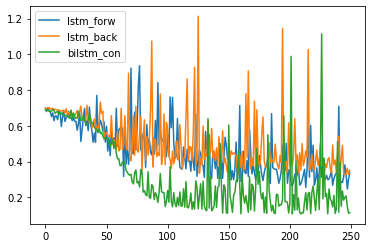

In [41]:
from matplotlib import pyplot
from pandas import DataFrame

results = DataFrame()
# lstm forwards
model = get_lstm_model(n_timesteps, False)
results['lstm_forw'] = train_model(model, n_timesteps)
# lstm backwards
model = get_lstm_model(n_timesteps, True)
results['lstm_back'] = train_model(model, n_timesteps)
# bidirectional concat
model = get_bi_lstm_model(n_timesteps, 'concat')
results['bilstm_con'] = train_model(model, n_timesteps)
# line plot of results
results.plot()
pyplot.show()

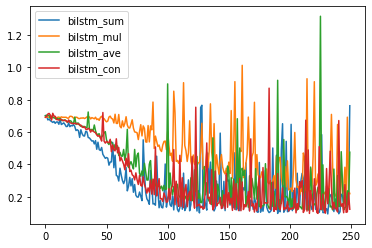

In [42]:
n_timesteps = 10
results = DataFrame()
# sum merge
model = get_bi_lstm_model(n_timesteps, 'sum')
results['bilstm_sum'] = train_model(model, n_timesteps)
# mul merge
model = get_bi_lstm_model(n_timesteps, 'mul')
results['bilstm_mul'] = train_model(model, n_timesteps)
# avg merge
model = get_bi_lstm_model(n_timesteps, 'ave')
results['bilstm_ave'] = train_model(model, n_timesteps)
# concat merge
model = get_bi_lstm_model(n_timesteps, 'concat')
results['bilstm_con'] = train_model(model, n_timesteps)
# line plot of results
results.plot()
pyplot.show()

## Problematic: [A novel approach for Automatic Acoustic Novelty Detection using a Denoising Autoencoder with Bidirectional LSTM Neural Networks](https://mediatum.ub.tum.de/doc/1253789/file.pdf)


In the world of challenging classification task that aims at recognising situations in which unusual events occur, the **Novelty Detection** can be useful to surveillance applications. In fact, the increasing desire in public security over the past decades has motivated the installation of sensors such as such as cameras or microphones inpublic areas. Thus, the need of unsupervised situation assessment stimulated the signal processing community to experiment with several according automated frameworks.

However, the information given by the acoustic signal offers several advantages, such as low computational needs or the fact that the illumination conditions of the space to be monitored do not have an effect on the sound.

This work proposed a novel purely *unsupervised approach to acoustic novelty detection*, that relies on *auditory spectral features* and *Denoising Autoencoders (DAEs)* with *Bidirectional Long Short-Term Memory(BLSTM)* *reccurent neural networks (RNNs). The auditory spectral features are processed by an autoencoder, which acts as a one-class classifier.

In our approach, the **training set** $(\chi_{tr})$ consist of *background environmental sounds*, and the **testing set** $(\chi_{te})$ consists of *recordings containing 'abnormal' sounds*. See the structure of the *denoising autoenconder (DAE)*, $\chi_{tr}$ contains data of *non-novel* acoustic events and $\chi_{te}$ consists of *novel* and *non-novel* acoustic events.

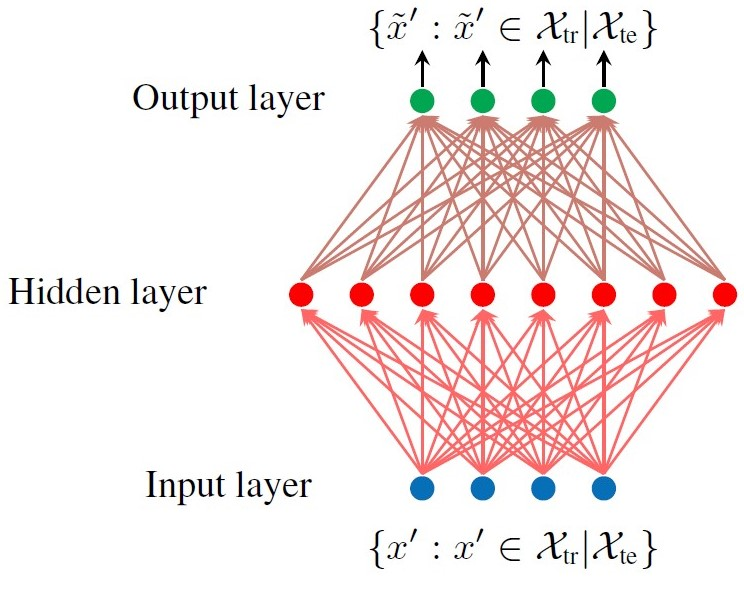

Next, we can see the block diagram of the proposed *novelty detector*. The features are extracted from the input signal; the reconstruction error between the input signal; the reconstruction error between the input and the reconstruc features is then processed by a thresholding block which detecs the *novel* and *non-novel* events.

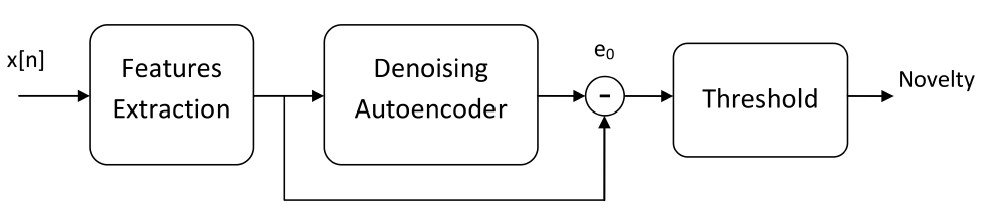

The best network layout for our BRNNs has **six hidden layers** (three for each direction) with **216 LSTM units**, each. Supervised learning was applied with up to **100 epochs** for training the network. Network weights are *recursively updated* by *standard gradient descent* with *backpropagation of the sum of squared error (SSE)*. The gradient descent algorithm requires the network wieghts to be initialised with non zero valeus; thus we initialise the weights with a *random Gaussian distribuition* with mean 0 and standard deviation 0.1. The **input and output layers** of the network have **54 units**.

We gonna remake the last example with this network layout (this choice was taken because of the difficulty to manipulate the sound data).

In [43]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

# define problem properties
n_timesteps = 54

# define BLSTM
model = Sequential()
#LSTM(# of first hidden layer memory units, 
#     activation='tanh',
#     recurrent_activation='sigmoid',
#     use_bias=True,
#     inputlayer=(# of timesteps, # of features)
#     return_sequences= whether to return the last output)
model.add(Bidirectional(LSTM(216, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train BLSTM
for epoch in range(100):
	# generate new random sequence
	X,y = get_sequence(n_timesteps)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=1, batch_size=1, verbose=2)
# evaluate BLSTM
X,y = get_sequence(n_timesteps)
yhat = model.predict_classes(X, verbose=0)
for i in range(n_timesteps):
	print('Expected:', y[0, i], 'Predicted', yhat[0, i])

1/1 - 3s - loss: 0.6952 - accuracy: 0.4074
1/1 - 0s - loss: 0.6873 - accuracy: 0.5185
1/1 - 0s - loss: 0.6691 - accuracy: 0.5926
1/1 - 0s - loss: 0.6649 - accuracy: 0.5741
1/1 - 0s - loss: 0.6445 - accuracy: 0.5926
1/1 - 0s - loss: 0.6104 - accuracy: 0.6111
1/1 - 0s - loss: 0.5188 - accuracy: 0.7037
1/1 - 0s - loss: 0.4819 - accuracy: 0.7037
1/1 - 0s - loss: 0.2349 - accuracy: 0.9259
1/1 - 0s - loss: 0.1688 - accuracy: 0.9630
1/1 - 0s - loss: 0.1436 - accuracy: 0.9630
1/1 - 0s - loss: 0.1546 - accuracy: 0.9259
1/1 - 0s - loss: 0.1792 - accuracy: 0.9444
1/1 - 0s - loss: 0.1681 - accuracy: 0.9444
1/1 - 0s - loss: 0.1413 - accuracy: 0.9815
1/1 - 0s - loss: 0.1085 - accuracy: 0.9815
1/1 - 0s - loss: 0.2809 - accuracy: 0.8704
1/1 - 0s - loss: 0.0947 - accuracy: 0.9630
1/1 - 0s - loss: 0.1222 - accuracy: 0.9444
1/1 - 0s - loss: 0.1800 - accuracy: 0.9074
1/1 - 0s - loss: 0.1617 - accuracy: 0.9259
1/1 - 0s - loss: 0.0655 - accuracy: 0.9815
1/1 - 0s - loss: 0.0709 - accuracy: 0.9815
1/1 - 0s - 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predic

In [44]:
def get_bi_lstm_model(n_timesteps, mode):
	model = Sequential()
	model.add(Bidirectional(LSTM(216, return_sequences=True), input_shape=(n_timesteps, 1), merge_mode=mode))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [45]:
def train_model(model, n_timesteps):
	loss = list()
	for _ in range(250):
		# generate new random sequence
		X,y = get_sequence(n_timesteps)
		# fit model for one epoch on this sequence
		hist = model.fit(X, y, epochs=1, batch_size=1, verbose=0)
		loss.append(hist.history['loss'][0])
	return loss

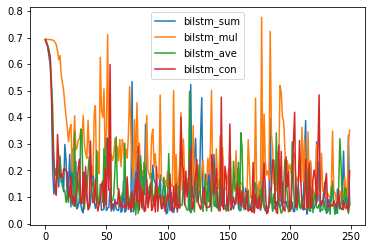

In [46]:
results = DataFrame()
# sum merge
model = get_bi_lstm_model(n_timesteps, 'sum')
results['bilstm_sum'] = train_model(model, n_timesteps)
# mul merge
model = get_bi_lstm_model(n_timesteps, 'mul')
results['bilstm_mul'] = train_model(model, n_timesteps)
# avg merge
model = get_bi_lstm_model(n_timesteps, 'ave')
results['bilstm_ave'] = train_model(model, n_timesteps)
# concat merge
model = get_bi_lstm_model(n_timesteps, 'concat')
results['bilstm_con'] = train_model(model, n_timesteps)
# line plot of results
results.plot()
pyplot.show()

#Bibliography


[1]   E. Marchi, F. Vesperini, F. Eyben, S. Squartini and B. Schuller, ["A novel approach for automatic acoustic novelty detection using a denoising autoencoder with bidirectional lstm neural networks"](https://mediatum.ub.tum.de/doc/1253789/file.pdf), Proc. of IEEE International Conference on Acoustics Speech and Signal Processing (ICASSP), pp. 1996-2000, 2015.

<!-- [2]   N. Japkowicz, C. Myers, M. Gluck et al., ["A novelty detection approach to classification"](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.40.3663&rep=rep1&type=pdf)
, Proceedings International Joint Conference on Artificial Intelligence IJCAI 1995, pp. 518-523, 1995. -->

[2]   M.A.F. Pimentel, D.A. Clifton, L. Clifton, L. Tarassenko, ["A review of novelty detection"](https://www-sciencedirect-com.rev-doc.isae.fr/science/article/pii/S016516841300515X/pdfft?md5=7c8fb4475b4d59a1a5c03103df108484&pid=1-s2.0-S016516841300515X-main.pdf), Signal Processing, Volume 99, 2014, Pages 215-249, ISSN 0165-1684.

[3]   A. Graves and J. Schmidhuber, ["Framewise phoneme classification with bidirectional {LSTM} and other neural network architectures"](https://www-sciencedirect-com.rev-doc.isae.fr/science/article/pii/S0893608005001206/pdfft?md5=c309497aaf1390dcf5f8da00c9fc2b7c&pid=1-s2.0-S0893608005001206-main.pdf), Neural Networks, vol. 18, no. 56, pp. 602-610, 2005.

<!-- [LSTM](https://en.wikipedia.org/wiki/Long_short-term_memory)

[Novelty detection](https://en.wikipedia.org/wiki/Novelty_detection)

[Autoenconder](https://en.wikipedia.org/wiki/Autoencoder)

[A. Gravesa, J. Schmidhuber](https://www-sciencedirect-com.rev-doc.isae.fr/science/article/pii/S0893608005001206/pdfft?md5=c309497aaf1390dcf5f8da00c9fc2b7c&pid=1-s2.0-S0893608005001206-main.pdf)



[BLSTM](https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/)

[E. Marchi, F. Vesperini](https://mediatum.ub.tum.de/doc/1253789/file.pdf) -->
